# What are people concerned about?

Let's import the question topics from all the live debates so far and see what topics jump out

In [53]:
import codecs
import collections

import numpy as np
import pandas as pd
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
import matplotlib.pyplot as plt

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [59]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [90]:
newStopWords= ['Kamala','Trump','friendly','Friendly','I','Why','like',
               'going','t','s','didn','doesn','What','think','good']
stopWords.append(newStopWords)

In [91]:
stopwords = set(STOPWORDS)
stopwords.update(newStopWords)

In [75]:
def total_tokens(text):
    n=WordPunctTokenizer().tokenize(text)
    filtered_n = [w for w in n if w not in stopwords]
    cleaned_n = [re.sub(r'[^\w\s]','',token) for token
                 in filtered_n if re.sub(r'[^\w\s]','',token)]
    return collections.Counter(cleaned_n), len(cleaned_n)

In [76]:
def make_df(counter, size):
    abs_freq = np.array([el[1] for el in counter])
    rel_freq = abs_freq / size
    df = pd.DataFrame(data=np.array([abs_freq, rel_freq]).T, index = [el[0] for el in counter], columns = ["Absolute frequency","Relative frequency"])
    df.index.name = "Most common topics"
    return df

In [20]:
topic_data=pd.read_excel("C:/Users/matth/OneDrive/Documents/Projects/Politics/Live_guest_topics.xlsx")


In [21]:
topic_data.head()

,Date:,Username:,Notes:,Pivots:,Time:
0,2024-09-22,Jane Fallout,"Friendly Her ban on price gouging, free health...",0.0,1
1,2024-09-22,et,"how has your life been better under Kamala, we...",0.0,5
2,2024-09-22,Enjoy Di,"Voting Trump, Housing policy how is her tax cr...",11.0,22
3,2024-09-22,THE1princehosea,Native American man who wanted to speak,NaN,NaN
4,2024-09-22,Azul,"Trump's a mediocre candidate, but Kamala's tax...",NaN,12


In [23]:
text = topic_data['Notes:'].str.cat(sep = " ")

In [84]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

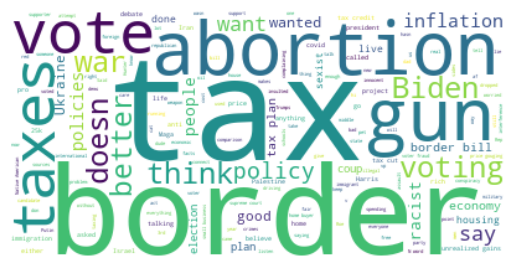

In [85]:
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [86]:
wordcloud.to_file("C:/Users/matth/OneDrive/Documents/Projects/Politics/word_cloud.jpg")

In [92]:
text_counter, text_size = total_tokens(text)

In [93]:
make_df(text_counter.most_common(20), text_size)

,Absolute frequency,Relative frequency
Most common topics,,
tax,35.0,0.018597
border,26.0,0.013815
vote,16.0,0.008502
Biden,16.0,0.008502
policy,15.0,0.007970
better,14.0,0.007439
war,14.0,0.007439
taxes,14.0,0.007439
plan,13.0,0.006908
